In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[ 2.47627608, -4.20858128],
       [-3.00171751, -1.65472017],
       [ 1.10671468, -5.86042323],
       ...,
       [-1.32173229, -1.76095374],
       [ 3.14256087, -6.85945625],
       [ 3.57297481, -5.40792589]])

In [7]:
y

array([1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2,
       1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0,
       0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2,
       0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1,

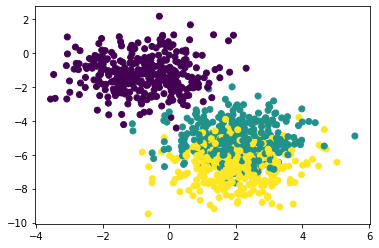

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [28]:
X_train_scaled = scaler.fit_transform(X_train)

In [29]:
X_train_scaled

array([[ 0.80669874, -0.62688975],
       [ 0.52012808, -0.8771531 ],
       [ 0.40583766, -1.41942444],
       ...,
       [ 0.62809075, -0.60893212],
       [ 0.72655479, -0.3690025 ],
       [ 1.28197486, -1.09130629]])

In [30]:
X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.cluster import KMeans

In [35]:
pip install --upgrade threadpoolctl scikit-learn


   ---------------------------------------- 9.3/9.3 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 301.8/301.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.1.0
    Uninstalling threadpoolctl-2.1.0:
      Successfully uninstalled threadpoolctl-2.1.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: tsfresh 0.18.0 has a non-standard dependency specifier matrixprofile>=1.1.10<2.0.0. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of tsfresh or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [38]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"


In [50]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    #wcss.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'